In [7]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

import edilecek modüller

In [8]:
df = pd.read_csv('car_data.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_value
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


yüklenen dataset

In [9]:
df['class_value'].value_counts()

class_value
0    1210
1     384
2      69
3      65
Name: count, dtype: int64

hedef veri dağılımı

In [10]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'class_value'],
      dtype='object')

features

In [11]:
#class value haricinde numpy array oluşturma
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']].values
X[0:3] # ekrana yazılan veri sayısı

array([[3, 3, 2, 2, 0, 0],
       [3, 3, 2, 2, 0, 1],
       [3, 3, 2, 2, 0, 2]], dtype=int64)

In [12]:
#class value feature kullanarak numpy array oluşturma
y = df['class_value'].values
y[1720:-1] #1720 ve 1728 arasındaki veriler

array([1, 2, 0, 2, 3, 0, 2], dtype=int64)

In [13]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.34164079,  1.34164079, -1.34164079, -1.33630621, -1.22474487,
        -1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.33630621, -1.22474487,
         0.        ],
       [ 1.34164079,  1.34164079, -1.34164079, -1.33630621, -1.22474487,
         1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.33630621,  0.        ,
        -1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.33630621,  0.        ,
         0.        ]])

verilerin normalizasyonu


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 4 ) #veriyi rastgele eğitim ve test setlerine bölerken kullanılan bir parametredir 
print("Train set:", X_train.shape , y_train.shape)
print("Test set:", X_test.shape , y_test.shape)

Train set: (1382, 6) (1382,)
Test set: (346, 6) (346,)


Eğitim/Test veri setinin ayrılması

In [15]:
from sklearn.neighbors import KNeighborsClassifier

k=3 
car = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
car

KNeighborsClassifier(n_neighbors=3)

### k=3 (En yakın 3 komşu içerisindeki yoğunluğa göre karar verecek)

car ismini verdiğimiz modelimizi eğittik. prediction yapalım ve sonuçların performansına bakalım.

In [16]:
y_hat=car.predict(X_test)
y_hat[0:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

knn algoritması ile tahmin 1000 adet

In [17]:
from sklearn import metrics

In [18]:
print("Eğitim 3 komşu ile doğruluğu:", metrics.accuracy_score(y_train,car.predict(X_train)))
print("Test 3 komşu ile Doğruluğu:", metrics.accuracy_score(y_test,y_hat))

Eğitim 3 komşu ile doğruluğu: 0.983357452966715
Test 3 komşu ile Doğruluğu: 0.976878612716763


aynı modelde komşu sayısını 10a çıkarsa

In [19]:
k = 8
car_test2 = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
print("Eğitim 8 komşu ile doğruluğu:", metrics.accuracy_score(y_train,car_test2.predict(X_train)))
print("Test 8 komşu ile doğruluğu:", metrics.accuracy_score(y_test,car_test2.predict(X_test)))

Eğitim 8 komşu ile doğruluğu: 0.9761215629522432
Test 8 komşu ile doğruluğu: 0.976878612716763


k=8 için performans

0-10 arasındaki bütün değerlerin testi

In [20]:
Ks=10
mean_acc = np.zeros ((Ks-1))
std_acc = np.zeros ((Ks-1))
ConfisionMatrix = [];
for n in range (1,Ks):
    car = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = car.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95375723, 0.91040462, 0.97687861, 0.96820809, 0.98843931,
       0.98265896, 0.97976879, 0.97687861, 0.97398844])

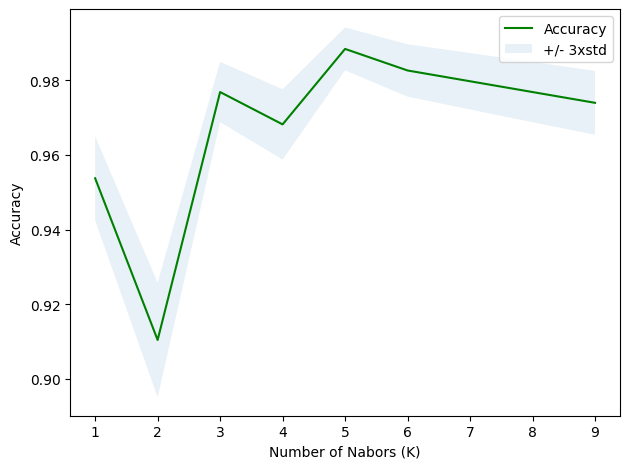

In [21]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc+ 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy' , '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

grafiğe göre en yüksek doğruluk 5 komşu olduğunda ortaya çıkıyor.

In [22]:
print("En yüksek doğruluk=", mean_acc.max(), "K=", mean_acc.argmax()+1,"olduğunda gerçekleşti")

En yüksek doğruluk= 0.9884393063583815 K= 5 olduğunda gerçekleşti
